# Perform machine learning using genomic vectors

## Read data

### Vector data

In [1]:
import os
from pathlib import Path

import pandas as pd


vectorsDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_vec')
vectorsTestDf = pd.read_csv(Path(vectorsDir, 'gene_test_vectorised.csv'))
vectorsTestDf.drop(columns=['BLOB_TEXT', 'Unnamed: 0'], inplace=True)
vectorsTrainDf = pd.read_csv(Path(vectorsDir, 'gene_train_vectorised.csv'))
vectorsTrainDf.drop(columns=['BLOB_TEXT', 'Unnamed: 0'], inplace=True)
vectorsValDf = pd.read_csv(Path(vectorsDir, 'gene_val_vectorised.csv'))
vectorsValDf.drop(columns=['BLOB_TEXT', 'Unnamed: 0'], inplace=True)
vectorsDf = pd.concat([vectorsTestDf, vectorsTrainDf, vectorsValDf], ignore_index=True)
vectorsDf

,patient_id,tube_id,vector
0,2092580,AH20L008,"[-0.2532142102718353, -0.12319359928369522, -0..."
1,2097130,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0...."
2,2097130,AH20I027,"[-0.39271822571754456, -0.22921983897686005, -..."
3,2110697,AH21C041,"[-0.2880496084690094, -0.16212013363838196, -0..."
4,2111939,AH19A091,"[-0.5479940176010132, -0.35276076197624207, -0..."
...,...,...,...
134,2185888,AH21B064,"[0.37154945731163025, 0.4720954895019531, 0.73..."
135,2191641,AH21A045,"[0.3131726384162903, 0.37569233775138855, 0.60..."
136,2195779,AH21A090,"[0.3441142737865448, 0.4080987870693207, 0.657..."
137,634545,AH21A011,"[0.3386542499065399, 0.45146483182907104, 0.68..."


### Tube ID mapping

In [2]:
import os
from pathlib import Path

import pandas as pd


patientTubeidMappingDf = pd.read_csv(Path(os.environ['GENOMICS_DATA_BASE'], 'patient_tube_id_mapping_full.tsv'), sep='\t')
patientTubeidMappingDf

,tube_code,PATIENT_ID,db_ID,pt_age,pt_gender,EPISODE_ID,hospital_admission,hospital_discharge,hospital_in_last_year,genome_species,species_reported,contig_number,length,tube_code_duplicate_or_old,date_of_collection,ID_number,location_additional_02,collected_from_original
0,AH19J072,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Escherichia coli,Escherichia coli,92,5131021,NaN,2019-10-30,19-303-0997,A-7EA;HAEM,Blood
1,AH19J074,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Streptococcus sp. D19,Streptococcus mitis group,84,2022991,NaN,2019-10-30,19-303-1174,A-7EA;HAEM,Blood Peripheral
2,AH19B003,526238.0,567AE,85,Male,640261.0,2019-02-04,2019-02-07,no,Escherichia coli,Escherichia coli,93,4942915,NaN,2019-02-03,19-034-1596,A-4WB;GMC,Blood
3,AH20A024,788941.0,3YBDS,58,Female,13194824.0,2020-01-16,2020-01-19,no,Escherichia coli,Escherichia coli,110,5149157,NaN,2020-01-16,20-016-2112,S-ED;Emergency,Blood Venous
4,AH20L041,1023735.0,2VJ78,42,Male,14210147.0,2020-12-18,2021-01-05,yes,Staphylococcus aureus,Staphylococcus aureus,46,2735216,NaN,2020-12-16,20-351-2856,Emergency Dept;nan,Blood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,ALF22L076,639020.0,3S6HL,84,Male,17219899.0,2022-12-15,2022-12-20,yes,Streptococcus vestibularis,Streptococcus salivarius group,107,1938627,NaN,2022-12-15,22-349-2150,Ward 4WB,Blood Peripheral
3113,ALF22L089,655404.0,6EWBM,67,Female,NaN,NaN,NaN,NaN,Proteus columbae,Proteus vulgaris,152,3972219,NaN,2022-12-17,22-351-1465,Comm/Amb Clinic,Blood
3114,ALF22L138,2572048.0,YM5PJ,61,Male,NaN,NaN,NaN,NaN,Enterobacter roggenkampii,Enterobacter cloacae complex,66,4876179,NaN,2022-12-27,22-361-0202,Ward 7 East,Hick White Lum
3115,ALF23A102,2054964.0,5DYAH,35,Female,17294287.0,2023-01-12,2023-02-01,yes,Streptococcus constellatus,Streptococcus anginosus group,54,1869828,NaN,2023-01-11,23-011-3305,ICU,Blood Venous


### Admission information

In [3]:
import os
from pathlib import Path

import pandas as pd


sourceDirName = Path(os.environ['DATA_DIR'], 'sepsis_prediction', 'lstm_initial_trials', '00_source_files')
admissionsDf = pd.read_csv(Path(sourceDirName, '2024-04-03-admissions.csv'))
admissionsDf

,PATIENT_ID,EPISODE_ID,PARENT_EPISODE_ID,start_date,end_date,PRIMARY_VISIT_REASON,E_LOS,H_LOS,DATEOFDEATH_DATETIME,ADMIT_TYPE,ADMITTING_WARD,EPISODE_ORGANISM_IDENTIFIED,ORGANISM,Organism_FIRST_NOTED,Organism_LAST_NOTED
0,2141606,8800,8800,2013-08-31 10:14:00.000,2013-08-31 15:04:00.000,DIALYSIS,5.00,5.00,2020-07-10 14:00:00.000,Planned Admission,A-CGD - Alfred/Caulfield Haemodialysis,85662,Staphylococcus aureus (MRSA),2014-08-31 08:45:41.000,2014-09-12 20:20:38.000
1,2141606,8800,8800,2013-08-31 10:14:00.000,2013-08-31 15:04:00.000,DIALYSIS,5.00,5.00,2020-07-10 14:00:00.000,Planned Admission,A-CGD - Alfred/Caulfield Haemodialysis,9984732,Staphylococcus aureus (MRSA),2014-08-31 08:17:49.000,2014-08-31 08:17:49.000
2,2141606,9467,9467,2013-09-03 13:30:00.000,2013-09-03 17:36:00.000,DIALYSIS,4.00,4.00,2020-07-10 14:00:00.000,Planned Admission,A-CGD - Alfred/Caulfield Haemodialysis,85662,Staphylococcus aureus (MRSA),2014-08-31 08:45:41.000,2014-09-12 20:20:38.000
3,2141606,9467,9467,2013-09-03 13:30:00.000,2013-09-03 17:36:00.000,DIALYSIS,4.00,4.00,2020-07-10 14:00:00.000,Planned Admission,A-CGD - Alfred/Caulfield Haemodialysis,9984732,Staphylococcus aureus (MRSA),2014-08-31 08:17:49.000,2014-08-31 08:17:49.000
4,2141606,9871,9871,2013-09-05 11:00:00.000,2013-09-06 18:16:00.000,CONSTIPATION & BLOATING - PHX UMBILICAL HERNIA,31.00,31.00,2020-07-10 14:00:00.000,Admission from ED,A-CC - Emergency Dept Cubicles,85662,Staphylococcus aureus (MRSA),2014-08-31 08:45:41.000,2014-09-12 20:20:38.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216684,642636,18390389,18390389,2024-01-17 11:45:00.000,2024-01-24 23:59:59.000,NaN,NaN,NaN,NaN,NaN,NaN,18696838,Burkholderia cepacia complex,2024-02-28 15:30:06.000,2024-02-28 15:30:06.000
216685,642636,18406829,18406829,2024-02-27 15:45:00.000,2024-03-05 23:59:59.000,4 Month Review,NaN,NaN,NaN,NaN,NaN,18696838,Burkholderia cepacia complex,2024-02-28 15:30:06.000,2024-02-28 15:30:06.000
216686,642636,18690618,18690618,2024-02-27 12:30:00.000,2024-03-05 23:59:59.000,NaN,NaN,NaN,NaN,NaN,NaN,18696838,Burkholderia cepacia complex,2024-02-28 15:30:06.000,2024-02-28 15:30:06.000
216687,642636,18696838,18696838,2024-02-28 08:28:23.000,2024-02-28 15:08:00.000,Chest pain NEC,6.67,6.67,NaN,NaN,NaN,18696838,Burkholderia cepacia complex,2024-02-28 15:30:06.000,2024-02-28 15:30:06.000


### Merge all the information

In [4]:
mergedDf = vectorsDf.merge(
    patientTubeidMappingDf[['tube_code', 'date_of_collection']].drop_duplicates(),
    how='inner',
    left_on=['tube_id'],
    right_on=['tube_code'],
).drop(
    columns=['tube_code']
).merge(
    admissionsDf[['PATIENT_ID', 'DATEOFDEATH_DATETIME']].drop_duplicates(),
    how='inner',
    left_on=['patient_id'],
    right_on=['PATIENT_ID']
).drop(
    columns=['PATIENT_ID']
)
mergedDf

,patient_id,tube_id,vector,date_of_collection,DATEOFDEATH_DATETIME
0,2092580,AH20L008,"[-0.2532142102718353, -0.12319359928369522, -0...",2020-12-02,2022-03-25 07:00:00.000
1,2097130,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0....",2019-10-31,2023-01-13 23:47:00.000
2,2097130,AH20I027,"[-0.39271822571754456, -0.22921983897686005, -...",2020-09-14,2023-01-13 23:47:00.000
3,2110697,AH21C041,"[-0.2880496084690094, -0.16212013363838196, -0...",2021-03-12,NaN
4,2111939,AH19A091,"[-0.5479940176010132, -0.35276076197624207, -0...",2019-01-27,NaN
...,...,...,...,...,...
134,2185888,AH21B064,"[0.37154945731163025, 0.4720954895019531, 0.73...",2021-02-21,2021-06-09 00:00:00.000
135,2191641,AH21A045,"[0.3131726384162903, 0.37569233775138855, 0.60...",2021-01-16,2021-11-08 00:00:00.000
136,2195779,AH21A090,"[0.3441142737865448, 0.4080987870693207, 0.657...",2021-01-29,NaN
137,634545,AH21A011,"[0.3386542499065399, 0.45146483182907104, 0.68...",2021-01-04,NaN


In [5]:
mergedDf['DATEOFDEATH_DATETIME'] = pd.to_datetime(mergedDf['DATEOFDEATH_DATETIME'], format='%Y-%m-%d %H:%M:%S.%f')
mergedDf['date_of_collection'] = pd.to_datetime(mergedDf['date_of_collection'], format='%Y-%m-%d')
mergedDf

,patient_id,tube_id,vector,date_of_collection,DATEOFDEATH_DATETIME
0,2092580,AH20L008,"[-0.2532142102718353, -0.12319359928369522, -0...",2020-12-02,2022-03-25 07:00:00
1,2097130,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0....",2019-10-31,2023-01-13 23:47:00
2,2097130,AH20I027,"[-0.39271822571754456, -0.22921983897686005, -...",2020-09-14,2023-01-13 23:47:00
3,2110697,AH21C041,"[-0.2880496084690094, -0.16212013363838196, -0...",2021-03-12,NaT
4,2111939,AH19A091,"[-0.5479940176010132, -0.35276076197624207, -0...",2019-01-27,NaT
...,...,...,...,...,...
134,2185888,AH21B064,"[0.37154945731163025, 0.4720954895019531, 0.73...",2021-02-21,2021-06-09 00:00:00
135,2191641,AH21A045,"[0.3131726384162903, 0.37569233775138855, 0.60...",2021-01-16,2021-11-08 00:00:00
136,2195779,AH21A090,"[0.3441142737865448, 0.4080987870693207, 0.657...",2021-01-29,NaT
137,634545,AH21A011,"[0.3386542499065399, 0.45146483182907104, 0.68...",2021-01-04,NaT


In [6]:
mergedDf['death_30_days'] = (((mergedDf.DATEOFDEATH_DATETIME - mergedDf.date_of_collection).dt.days >= 0) & ((mergedDf.DATEOFDEATH_DATETIME - mergedDf.date_of_collection).dt.days < 30))
mergedDf

,patient_id,tube_id,vector,date_of_collection,DATEOFDEATH_DATETIME,death_30_days
0,2092580,AH20L008,"[-0.2532142102718353, -0.12319359928369522, -0...",2020-12-02,2022-03-25 07:00:00,False
1,2097130,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0....",2019-10-31,2023-01-13 23:47:00,False
2,2097130,AH20I027,"[-0.39271822571754456, -0.22921983897686005, -...",2020-09-14,2023-01-13 23:47:00,False
3,2110697,AH21C041,"[-0.2880496084690094, -0.16212013363838196, -0...",2021-03-12,NaT,False
4,2111939,AH19A091,"[-0.5479940176010132, -0.35276076197624207, -0...",2019-01-27,NaT,False
...,...,...,...,...,...,...
134,2185888,AH21B064,"[0.37154945731163025, 0.4720954895019531, 0.73...",2021-02-21,2021-06-09 00:00:00,False
135,2191641,AH21A045,"[0.3131726384162903, 0.37569233775138855, 0.60...",2021-01-16,2021-11-08 00:00:00,False
136,2195779,AH21A090,"[0.3441142737865448, 0.4080987870693207, 0.657...",2021-01-29,NaT,False
137,634545,AH21A011,"[0.3386542499065399, 0.45146483182907104, 0.68...",2021-01-04,NaT,False


## Create data

In [7]:
import ast
import numpy as np


X = mergedDf['vector']
X = X.apply(ast.literal_eval)
X=np.vstack(X).astype(np.float32)
Y = mergedDf['death_30_days'].apply(lambda x: 1 if x else 0)
Y=np.vstack(Y).astype(np.float32)

In [8]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=False)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((125, 300), (14, 300), (125, 1), (14, 1))

In [9]:
import torch
from torch import nn
import torch.utils.data as data


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32)

loader = data.DataLoader(data.TensorDataset(X_train_tensor, Y_train_tensor), shuffle=False, batch_size=1024)

In [10]:
print(X_train_tensor.shape, Y_train_tensor.shape, X_test_tensor.shape, Y_test_tensor.shape)

torch.Size([125, 300]) torch.Size([125, 1]) torch.Size([14, 300]) torch.Size([14, 1])


In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [12]:
class DnnModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(X_train_tensor.shape[1], int(X_train_tensor.shape[1]/2))
        self.linear2 = nn.Linear(int(X_train_tensor.shape[1]/2), 1)
        self.relu = nn.ReLU()
        # self.dropout = nn.Dropout(p=0.25)
    def forward(self, x):
        # return self.linear2(self.dropout(self.relu(self.linear1(x))))
        return self.linear2(self.relu(self.linear1(x)))

In [13]:
model = DnnModel().to(device)
model

DnnModel(
  (linear1): Linear(in_features=300, out_features=150, bias=True)
  (linear2): Linear(in_features=150, out_features=1, bias=True)
  (relu): ReLU()
)

In [14]:
learning_rate = 0.003

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)

In [15]:
# Forward pass
logits = model(X_train_tensor)

In [16]:
pred_probab = torch.round(torch.sigmoid(logits))

In [17]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = correct / len(y_pred) * 100
    return acc

In [18]:
# Number of epochs
epochs = 5000

# Send data to the device
x_train, x_valid = X_train_tensor.to(device), X_test_tensor.to(device)
y_train, y_valid = Y_train_tensor.to(device), Y_test_tensor.to(device)

# Empty loss lists to track values
epoch_count, train_loss_values, valid_loss_values = [], [], []

# Loop through the data
for epoch in range(epochs):

    # Put the model in training mode
    model.train()

    y_logits = model(x_train) # forward pass to get predictions; squeeze the logits into the same shape as the labels
    y_pred = torch.round(torch.sigmoid(y_logits)) # convert logits into prediction probabilities

    loss = loss_fn(y_logits, y_train) # compute the loss   
    acc = accuracy_fn(y_train.int(), y_pred) # calculate the accuracy; convert the labels to integers

    optimizer.zero_grad() # reset the gradients so they don't accumulate each iteration
    loss.backward() # backward pass: backpropagate the prediction loss
    optimizer.step() # gradient descent: adjust the parameters by the gradients collected in the backward pass
    
    # Put the model in evaluation mode
    model.eval() 

    with torch.inference_mode():
        valid_logits = model(x_valid)
        valid_pred = torch.round(torch.sigmoid(valid_logits))    

        valid_loss = loss_fn(valid_logits, y_valid)
        valid_acc = accuracy_fn(y_valid.int(), valid_pred)    
    
    # Print progress a total of 20 times
    if epoch % int(epochs / 20) == 0:
        print(f'Epoch: {epoch:4.0f} | Train Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Validation Loss: {valid_loss:.5f}, Accuracy: {valid_acc:.2f}%')

        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        valid_loss_values.append(valid_loss.detach().numpy())

Epoch:    0 | Train Loss: 0.72658, Accuracy: 8.00% | Validation Loss: 0.71735, Accuracy: 14.29%
Epoch:  250 | Train Loss: 0.33391, Accuracy: 92.00% | Validation Loss: 0.46255, Accuracy: 85.71%
Epoch:  500 | Train Loss: 0.28071, Accuracy: 92.00% | Validation Loss: 0.43775, Accuracy: 85.71%
Epoch:  750 | Train Loss: 0.27076, Accuracy: 92.00% | Validation Loss: 0.43417, Accuracy: 85.71%
Epoch: 1000 | Train Loss: 0.26661, Accuracy: 92.00% | Validation Loss: 0.43167, Accuracy: 85.71%
Epoch: 1250 | Train Loss: 0.26411, Accuracy: 92.00% | Validation Loss: 0.42936, Accuracy: 85.71%
Epoch: 1500 | Train Loss: 0.26240, Accuracy: 92.00% | Validation Loss: 0.42732, Accuracy: 85.71%
Epoch: 1750 | Train Loss: 0.26114, Accuracy: 92.00% | Validation Loss: 0.42553, Accuracy: 85.71%
Epoch: 2000 | Train Loss: 0.26019, Accuracy: 92.00% | Validation Loss: 0.42396, Accuracy: 85.71%
Epoch: 2250 | Train Loss: 0.25943, Accuracy: 92.00% | Validation Loss: 0.42254, Accuracy: 85.71%
Epoch: 2500 | Train Loss: 0.258

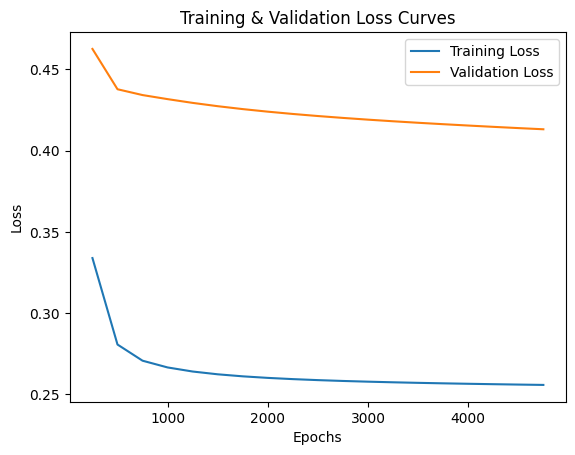

In [19]:
from matplotlib import pyplot as plt


plt.plot(epoch_count[1:], train_loss_values[1:], label='Training Loss')
plt.plot(epoch_count[1:], valid_loss_values[1:], label='Validation Loss')
plt.title('Training & Validation Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

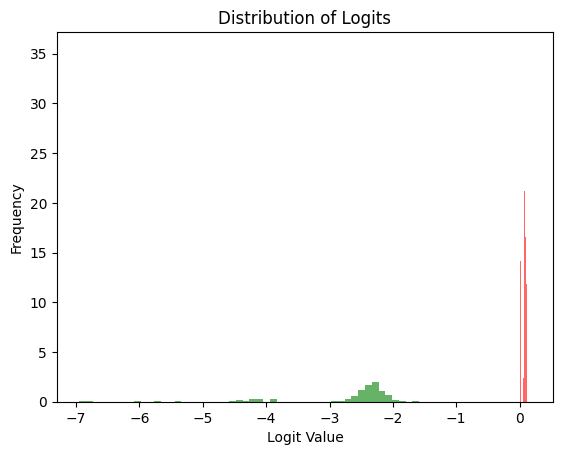

In [20]:
y_logits = model(x_train).squeeze() # forward pass to get predictions; squeeze the logits into the same shape as the labels
    # y_pred = torch.round(torch.sigmoid(y_logits)) # convert logits into prediction probabilities
# Create the histogram
plt.hist(y_logits.detach().numpy(), bins=50, density=True, alpha=0.6, color='g')
plt.hist(torch.sigmoid(y_logits).detach().numpy(), bins=50, density=True, alpha=0.6, color='r')

# Add labels and title
plt.xlabel('Logit Value')
plt.ylabel('Frequency')
plt.title('Distribution of Logits')

# Display the plot
plt.show()

In [21]:
y_logits = model(X_test_tensor).squeeze() # forward pass to get predictions; squeeze the logits into the same shape as the labels

In [22]:
from sklearn.metrics import roc_auc_score


score = roc_auc_score(Y_test_tensor, y_logits.detach().numpy())
score

np.float64(0.7916666666666666)

In [23]:
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(Y_test_tensor, y_logits.detach().numpy())

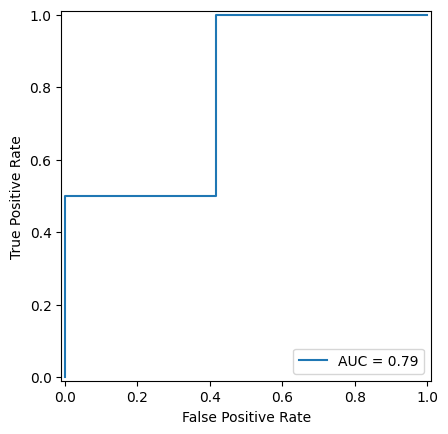

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay


display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=score)
display.plot()
plt.show()